In [1]:
from google.colab import files
uploaded = files.upload()

Saving Flipkart_Mobiles.csv to Flipkart_Mobiles.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
df=pd.read_csv("Flipkart_Mobiles.csv")

In [4]:
df.head(5)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990


In [5]:
df.describe()

,Rating,Selling Price,Original Price
count,2970.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025
std,0.271991,30066.892622,31525.599889
min,2.300000,1000.000000,1000.000000
25%,4.100000,9990.000000,10030.250000
50%,4.300000,15000.000000,16889.500000
75%,4.400000,28999.000000,31500.000000
max,5.000000,179900.000000,189999.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


In [7]:
# Fill missing values in 'Memory' and 'Storage' with the mode
df['Memory'].fillna(df['Memory'].mode()[0], inplace=True)
df['Storage'].fillna(df['Storage'].mode()[0], inplace=True)

In [8]:
# Fill missing values in 'Rating' with the median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [9]:
missing_values = df.isnull().sum()
print(missing_values)

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64


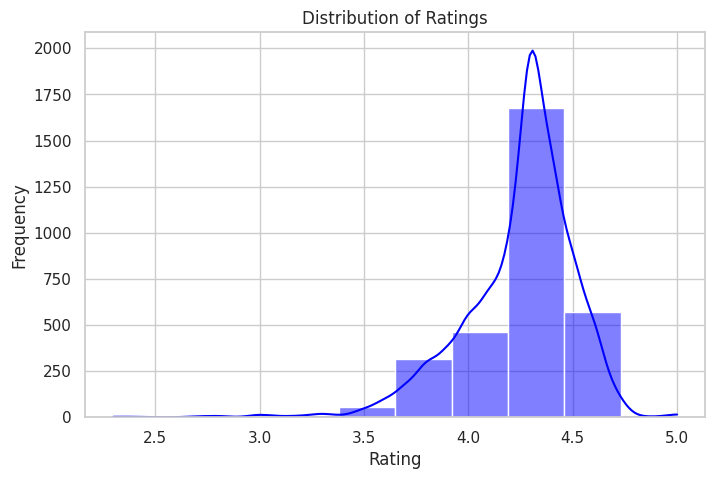

In [10]:
# Set the style for the plots
sns.set(style="whitegrid")

# Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

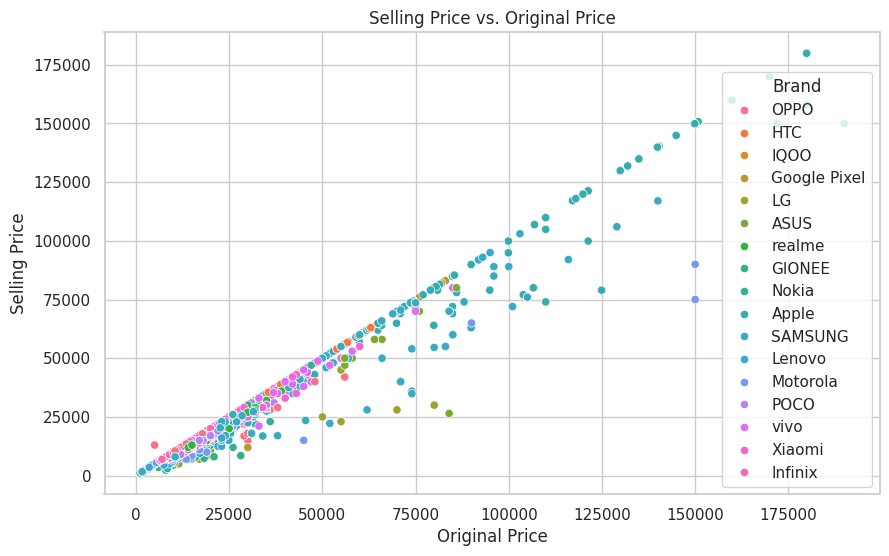

In [11]:
# Relationship between Selling Price and Original Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Price', y='Selling Price', data=df, hue='Brand')
plt.title('Selling Price vs. Original Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.show()

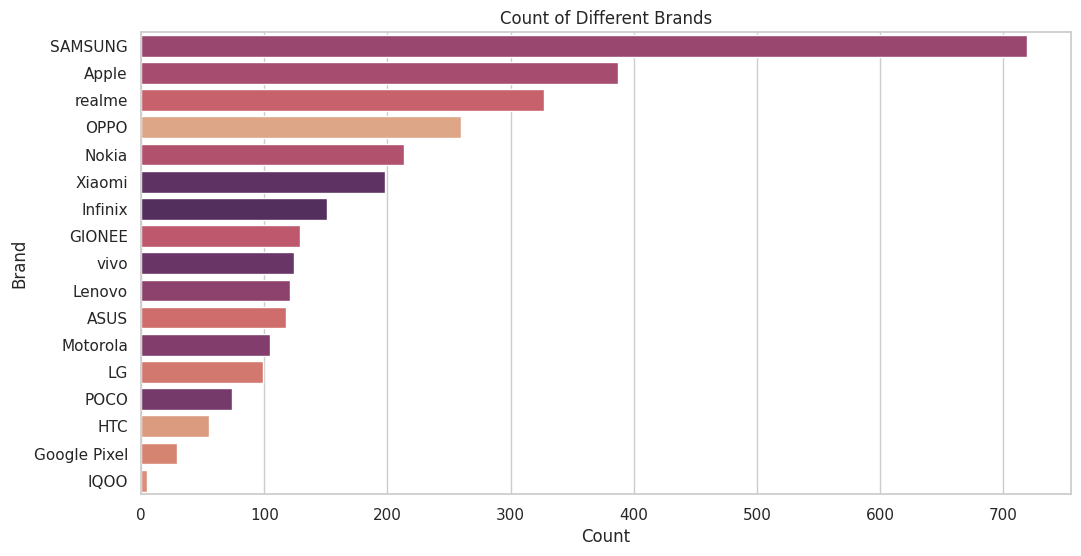

In [12]:
#  Count of Different Brands
plt.figure(figsize=(12, 6))
sns.countplot(y='Brand', data=df, order=df['Brand'].value_counts().index, palette='flare', hue='Brand', legend=False)
plt.title('Count of Different Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

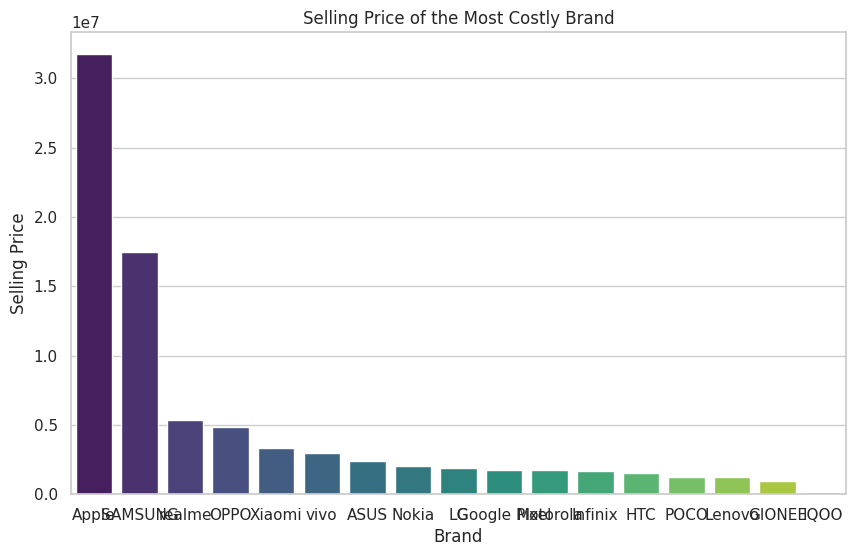

In [13]:
most_costly_brand = df.groupby(["Brand"],as_index=False)["Selling Price"].sum().sort_values(by="Selling Price",ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Brand", y="Selling Price", data=most_costly_brand, hue="Brand", palette="viridis", legend=False)
plt.title('Selling Price of the Most Costly Brand')
plt.xlabel('Brand')
plt.ylabel('Selling Price')
plt.show()

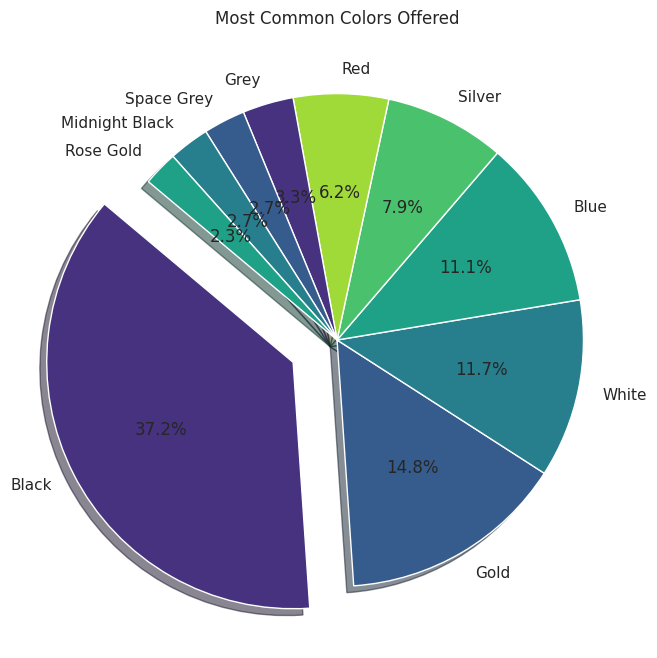

In [14]:
common_colors = df["Color"].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(common_colors,labels=common_colors.index,autopct='%1.1f%%',startangle=140,colors=sns.color_palette("viridis"),explode=[0.2,0,0,0,0,0,0,0,0,0],shadow=True)
plt.title("Most Common Colors Offered")
plt.show()

In [15]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Rating,Selling Price,Original Price
Rating,1.000000,0.413764,0.413119
Selling Price,0.413764,1.000000,0.986097
Original Price,0.413119,0.986097,1.000000


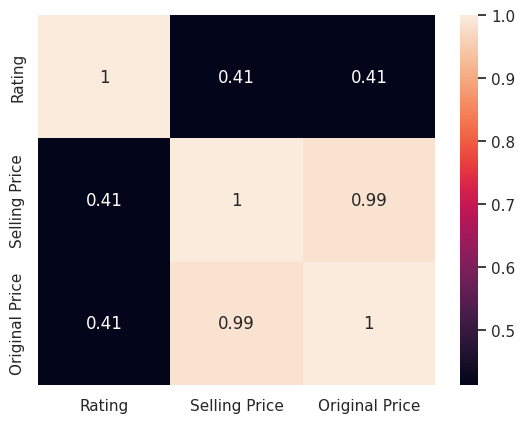

In [16]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [17]:
# Assume each model is a user and each product is rated (simplification for this example)
user_item_matrix = df.pivot_table(index='Model', columns='Brand', values='Rating')

In [18]:
# Fill NaN values with 0
user_item_matrix.fillna(0, inplace=True)

In [19]:
# Calculate cosine similarity between items
item_similarity = cosine_similarity(user_item_matrix.T)

In [20]:
# Convert into a DataFrame
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [21]:
# Function to recommend products
def recommend_products(brand, num_recommendations=5):
    similar_brands = item_similarity_df[brand].sort_values(ascending=False)[1:num_recommendations+1]
    return similar_brands

In [22]:
# Example: Recommend 5 products similar to a given brand
recommendations = recommend_products('OPPO', 5)
print("Recommendations for 'OPPO':\n", recommendations)

Recommendations for 'OPPO':
 Brand
POCO        0.029873
ASUS        0.000000
Motorola    0.000000
realme      0.000000
Xiaomi      0.000000
Name: OPPO, dtype: float64


In [23]:
# Example: Recommend 5 products similar to a given brand
recommendations = recommend_products('realme', 5)
print("Recommendations for 'realme':\n", recommendations)

Recommendations for 'realme':
 Brand
IQOO            0.129362
Nokia           0.080704
Google Pixel    0.078896
POCO            0.033455
ASUS            0.000000
Name: realme, dtype: float64
